# Test Canruti Resnet 34 Preentrenada en Clinic

Los pasos realizados con la Resnet 34 serán análogos a los de la Resnet 18

In [20]:
import fastai
import torch
from fastai.vision import *
from shutil import copyfile
plt.rcParams.update({'font.size': 18})




In [2]:
dic = {
      'ATYPICAL_LYMPHOCYTE':[],
      'VARIANT_LYMPHOCYTE':[],
      'BLAST':[]
     }

## Se crean los directorios de células de CanRuti

In [3]:
def print_dirs_recursively(root_dir):
    root_dir = os.path.abspath(root_dir)

    for item in os.listdir(root_dir):
        item_full_path = os.path.join(root_dir, item)
        if os.path.isdir(item_full_path):
            print_dirs_recursively(item_full_path)
        else: 
            if '/SLPC/' in item_full_path:
                dic['ATYPICAL_LYMPHOCYTE'].append(item_full_path)
            if '/REACTIUS/' in item_full_path:
                dic['VARIANT_LYMPHOCYTE'].append(item_full_path)
            if '/LA/' in item_full_path:
                dic['BLAST'].append(item_full_path)

print_dirs_recursively('/shared/can_ruti')

In [4]:
#for item in dic.values():
#    for path in item:
#
#        if '/SLPC/' in path:
#            filename = os.path.basename(path)
#            copyfile(path, os.path.join("/shared/Classification_CanRuti/ATYPICAL_LYMPHOCYTE", filename))
#      
#        if '/REACTIUS/' in path:
#            filename = os.path.basename(path)
#            copyfile(path, os.path.join("/shared/Classification_CanRuti/VARIANT_LYMPHOCYTE", filename))
#            
#        if '/LA/' in path:
#            filename = os.path.basename(path)
#            copyfile(path, os.path.join("/shared/Classification_CanRuti/BLAST", filename))            
#                    
#
#

#### Descripción del Conjunto de datos de validación de Can Ruti

In [5]:
folder_1 = os.listdir("/shared/Classification_CanRuti/ATYPICAL_LYMPHOCYTE")
folder_2 = os.listdir("/shared/Classification_CanRuti/VARIANT_LYMPHOCYTE")
folder_3 = os.listdir("/shared/Classification_CanRuti/BLAST")
dic_Classif = {
      'ATYPICAL_LYMPHOCYTE':len(folder_1),
      'VARIANT_LYMPHOCYTE':len(folder_2),
      'BLAST':len(folder_3)
     }

pd.DataFrame(dic_Classif, index=['N'])

ATYPICAL_LYMPHOCYTE  VARIANT_LYMPHOCYTE  BLAST
N                   47                  57     80

In [6]:
folder_classes = "/shared/Classification_CanRuti"
tfms = get_transforms(flip_vert=True, max_warp=None, max_zoom=1.01, max_rotate=120, max_lighting=0.1)





#### Creación de DataBunch

In [7]:
data = (ImageList.from_folder(folder_classes) #Where to find the data? -> in path and its subfolders
        .split_by_rand_pct(0.5,seed=4)           #How to split in train/valid? -> use the folders
        .label_from_folder()            #How to label? -> depending on the folder of the filenames
        .transform(tfms, size=224)       #Data augmentation? -> use tfms with a size of 64
        .databunch()
        .normalize(imagenet_stats))   

In [8]:
data.batch_size = 20

#### Descripción de conjuntos `train` y `valid` (validation set será el `test`)

In [9]:
pd.DataFrame.from_dict({'Number of classes':[data.c],
'train_size':[len(data.train_ds)],
'valid_size':[len(data.valid_ds)]},
orient = 'index', columns=['N'])

N
Number of classes   3
train_size         92
valid_size         92

#### Descripción del reparto de clases en cada set

`Train set`

In [10]:
train_ds = data.train_ds.to_df()
pd.DataFrame(train_ds['y'].value_counts()).rename(columns={'y':'N'})

N
BLAST                43
VARIANT_LYMPHOCYTE   27
ATYPICAL_LYMPHOCYTE  22

`Validation set`

In [11]:
valid_ds = data.valid_ds.to_df()
pd.DataFrame(valid_ds['y'].value_counts()).rename(columns={'y':'N'})

N
BLAST                37
VARIANT_LYMPHOCYTE   30
ATYPICAL_LYMPHOCYTE  25

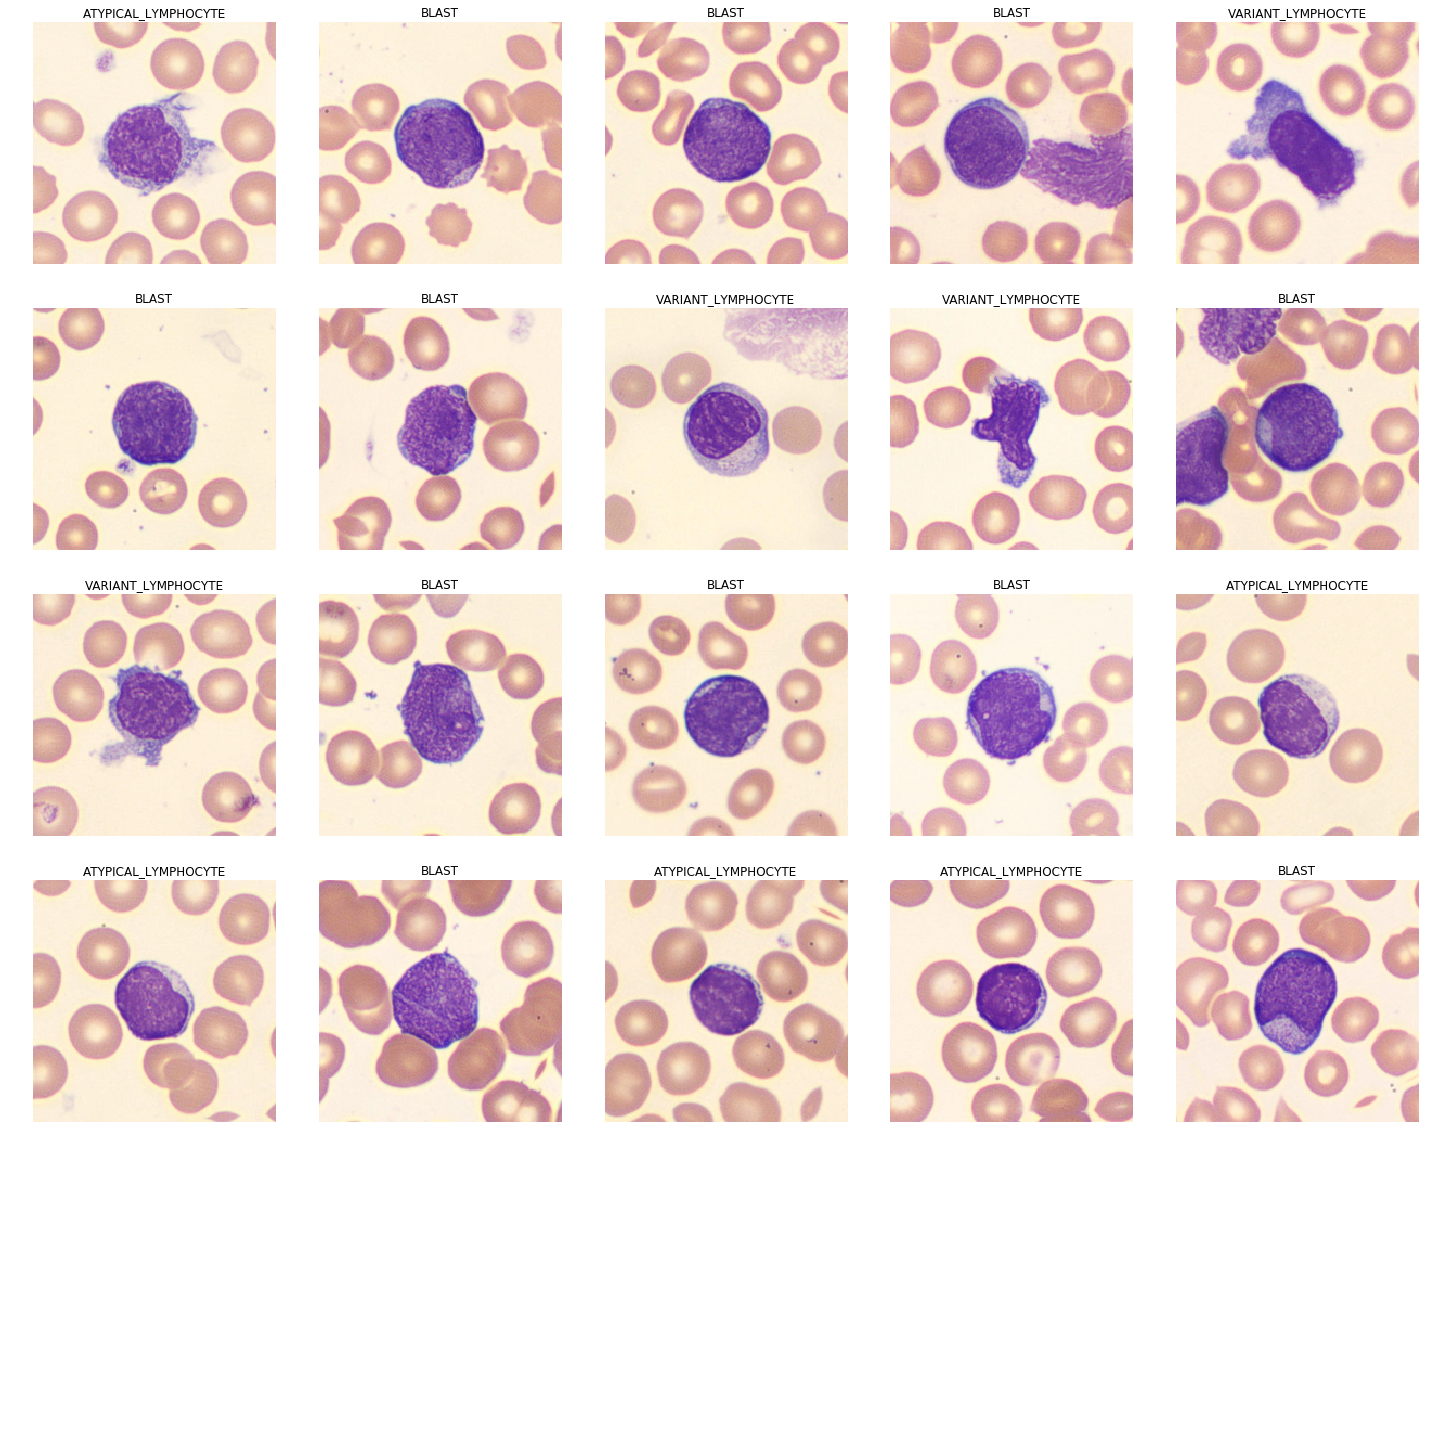

In [12]:
data.show_batch()

In [14]:
folder_model = "/shared/Classification_Clinic_Balanced"


In [15]:
learn = None
learn = load_learner(folder_model, 'export_stage-2-34-Clinic_Balanced_3_Classes')
learn.data = data



In [16]:
results = learn.validate(data.valid_dl)

valid_CanRuti = dict(zip(['valid_loss', 'error_rate', 'accuracy'],
                         [results[0], results[1].item(),results[2].item()]))

pd.DataFrame(valid_CanRuti, index = ['metrics'])

valid_loss  error_rate  accuracy
metrics    4.677593    0.717391  0.282609

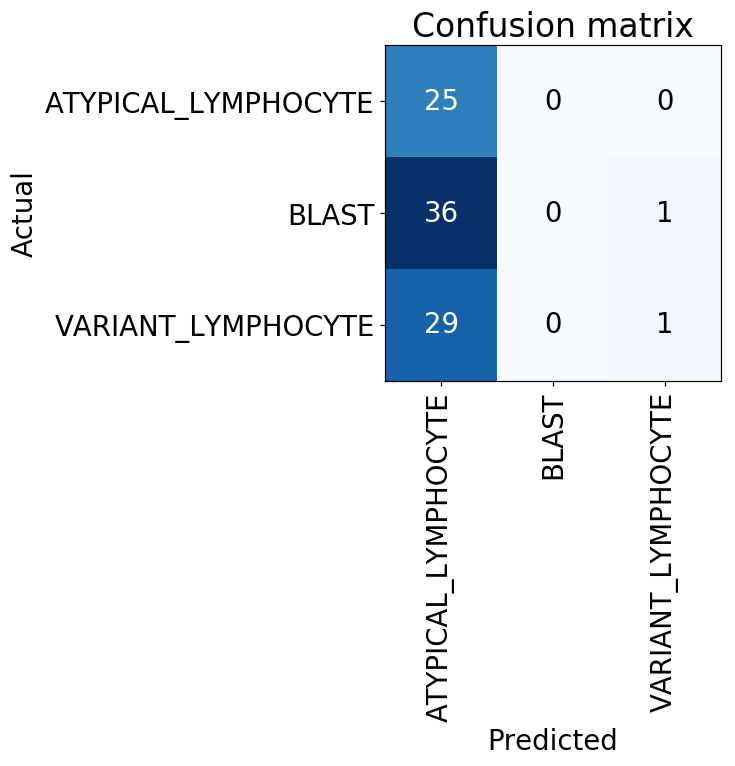

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
interp.plot_confusion_matrix(figsize=(7,7), dpi=110)

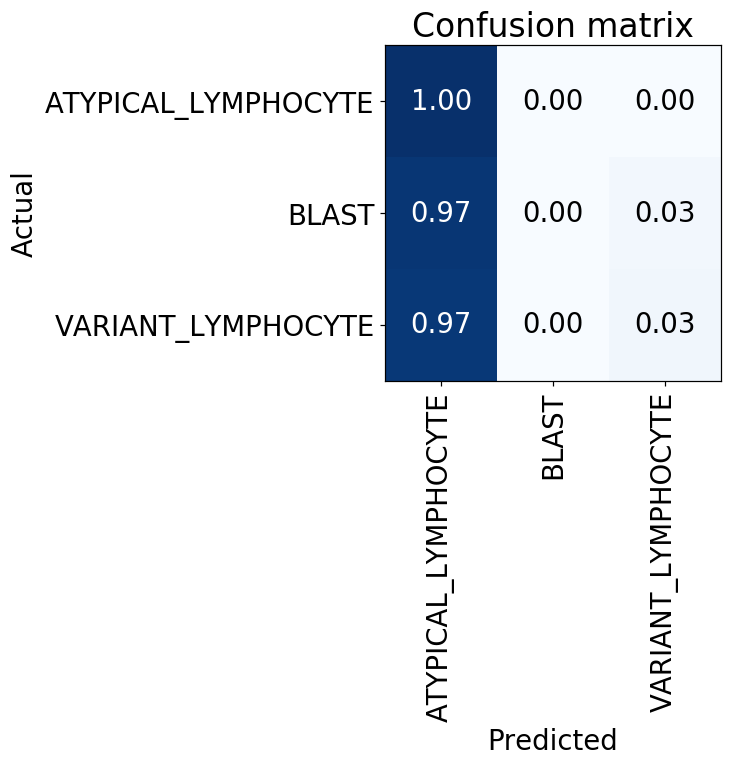

In [22]:
interp.plot_confusion_matrix(figsize=(7,7), dpi=110, normalize=True)

In [23]:
len(data.valid_ds)==len(losses)==len(idxs)

True

In [24]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=3e-5)

In [25]:
learn.fit_one_cycle(2, max_lr=3e-5)

In [26]:
learn.fit_one_cycle(2, max_lr=3e-5)

In [27]:
learn.fit_one_cycle(2, max_lr=3e-6)

In [28]:
learn.fit_one_cycle(2, max_lr=slice(3e-7))

In [29]:
learn.fit_one_cycle(2, max_lr=slice(3e-7))

In [30]:
learn.fit_one_cycle(2, max_lr=slice(3e-8))

In [31]:
learn.fit_one_cycle(2, max_lr=slice(3e-4))

In [32]:
learn.fit_one_cycle(2, max_lr=slice(3e-5))

In [33]:
learn.fit_one_cycle(2, max_lr=slice(3e-5))

In [34]:
learn.fit_one_cycle(2, max_lr=slice(3e-6))

In [35]:
learn.fit_one_cycle(2, max_lr=slice(3e-4))

In [36]:
learn.fit_one_cycle(2, max_lr=slice(3e-4))

In [37]:
learn.fit_one_cycle(2, max_lr=slice(3e-4))

In [38]:
learn.fit_one_cycle(2, max_lr=slice(3e-4))

In [39]:
learn.fit_one_cycle(2, max_lr=slice(3e-5))

In [40]:
learn.export('export_stage-2-34-CanRuti_3_Classes')

In [41]:
interp = ClassificationInterpretation.from_learner(learn)

interp.most_confused(min_val=2)

[]

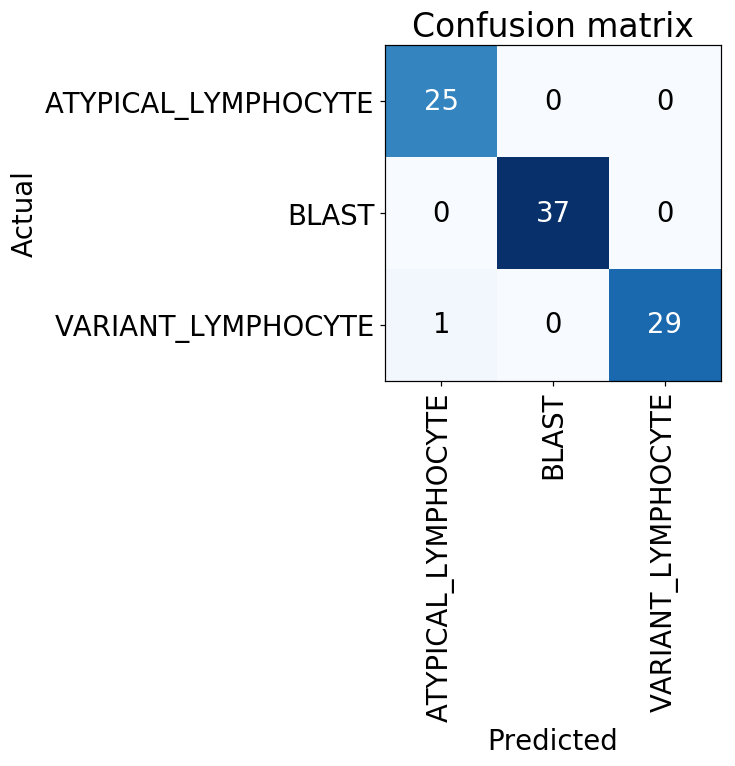

In [43]:
interp.plot_confusion_matrix(figsize=(7,7), dpi=110)

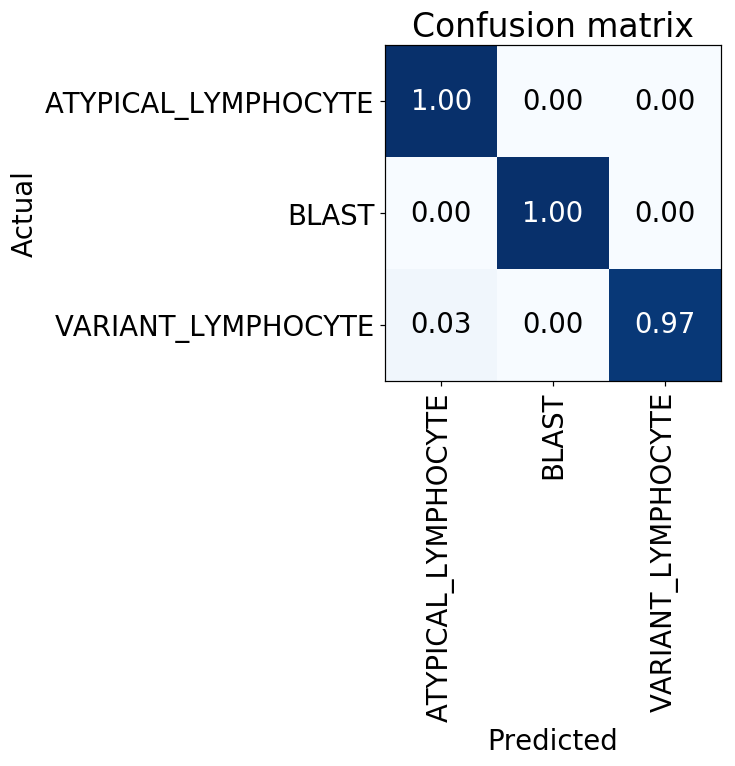

In [44]:
interp.plot_confusion_matrix(figsize=(7,7), dpi=110, normalize=True)

In [45]:
losses,idxs = interp.top_losses()

In [46]:
len(data.valid_ds)==len(losses)==len(idxs)

True

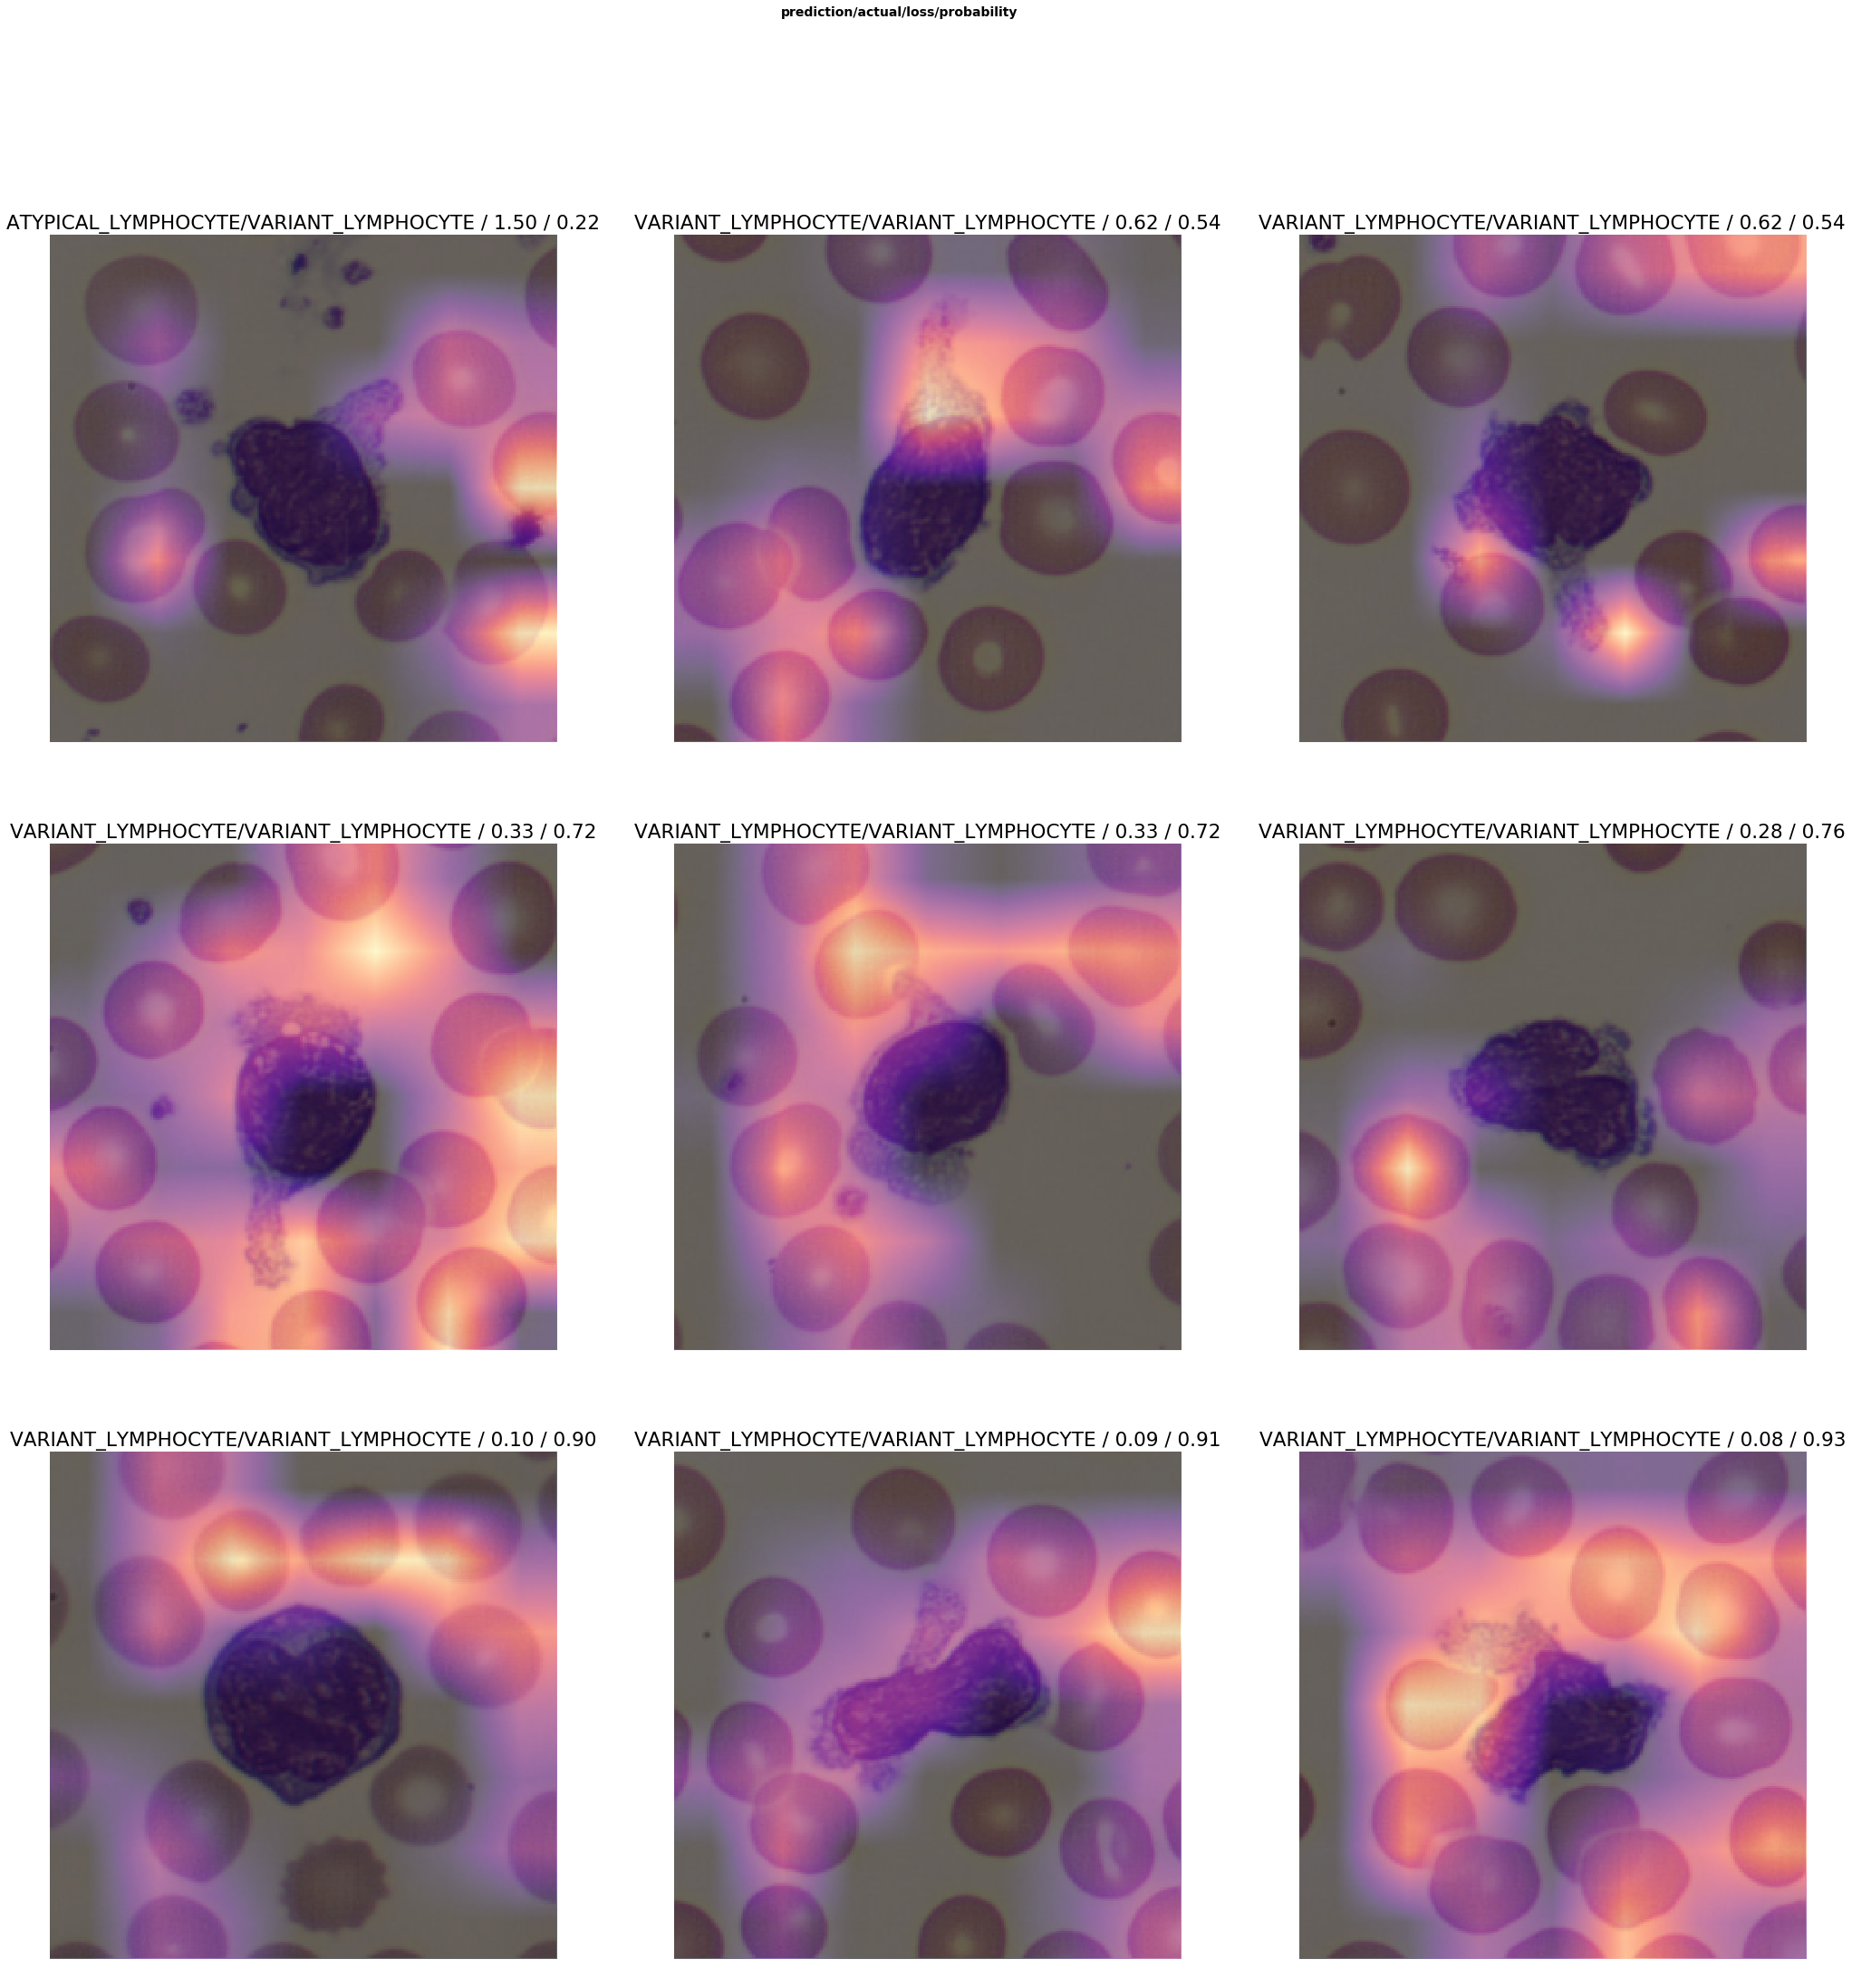

In [47]:
interp.plot_top_losses(9, largest=True, figsize=(35,35))


